#                                     LETSGROWMORE INTERNSHIP 
##                                                              TASK 1
###                                                        IRIS FLOWER CLASSIFICATION


In [1]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
%matplotlib inline

In [2]:
df = pd.read_csv("iris_csv.csv")
df.head()


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [6]:
df.shape

(150, 5)

In [7]:
data=df.replace(to_replace={'class':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})
data.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
data.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [9]:
data['class'] = data['class'].astype('category').cat.codes

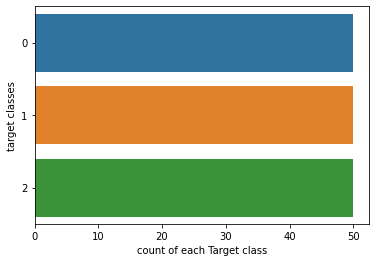

In [10]:
sns.countplot(y=data['class'],data=data)
plt.ylabel('target classes')
plt.xlabel('count of each Target class')
plt.show()

<AxesSubplot:>

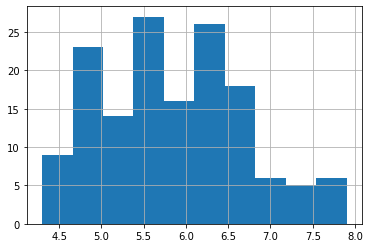

In [11]:
data['sepallength'].hist()

<AxesSubplot:>

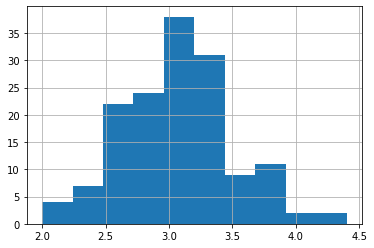

In [12]:
df['sepalwidth'].hist()

<AxesSubplot:>

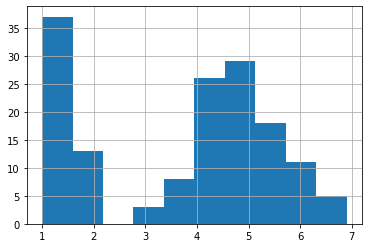

In [13]:
df['petallength'].hist()

<AxesSubplot:>

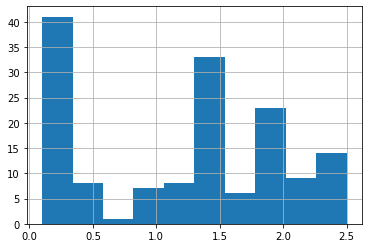

In [14]:
data['petalwidth'].hist()

In [15]:
df.corr()

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

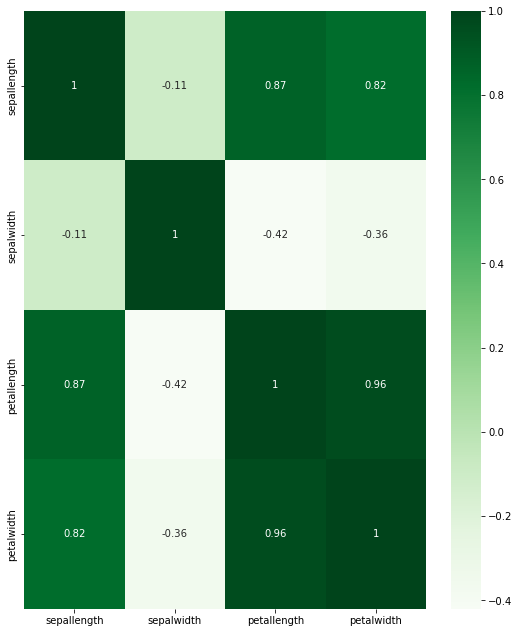

In [16]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (9,11))
sns.heatmap(corr, cmap="Greens", annot = True, ax = ax)

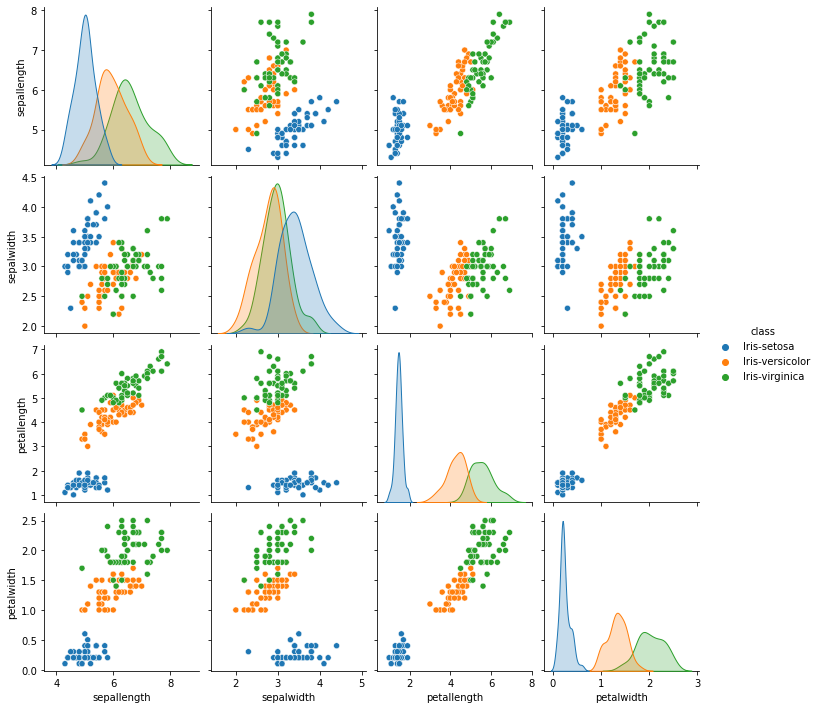

In [17]:
sns.pairplot(df.iloc[:,:],hue='class')

In [18]:
X = data.drop(['class'], axis=1)
Y = data['class']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [20]:
X_train, X_test,Y_train, Y_test = train_test_split(X ,Y ,test_size = 0.30, random_state=0)
print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (105, 4)
Test Shape (45, 4)


In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
model.fit(X_train, Y_train)

LogisticRegression()

In [23]:
print("Accuracy: ",model.score(X_test, Y_test)*100)

Accuracy:  97.77777777777777


In [24]:
predicted=model.predict(X_test)
predicted

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0], dtype=int8)

In [25]:
print('The accuracy of the model is',metrics.accuracy_score(predicted,Y_test))

The accuracy of the model is 0.9777777777777777
